**19EID331P** 

Artificial Neural Networks Lab

Name : M.Murali Krishna

Regd.no:322010404039

Section:ECE AIML

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
[ds_raw_train, ds_raw_test], info = tfds.load('mnist', split=['train[:10%]','test[:10%]'], as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
print("Number of samples in train : ", ds_raw_train.cardinality().numpy(),
      " in test : ",ds_raw_test.cardinality().numpy())

Number of samples in train :  6000  in test :  1000


In [ ]:
print("Number of classes/labels: ",info.features["label"].num_classes)
print("Names of classes/labels: ",info.features["label"].names)
labels= info.features["label"].names

Number of classes/labels:  10
Names of classes/labels:  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


9 samples from the dataset


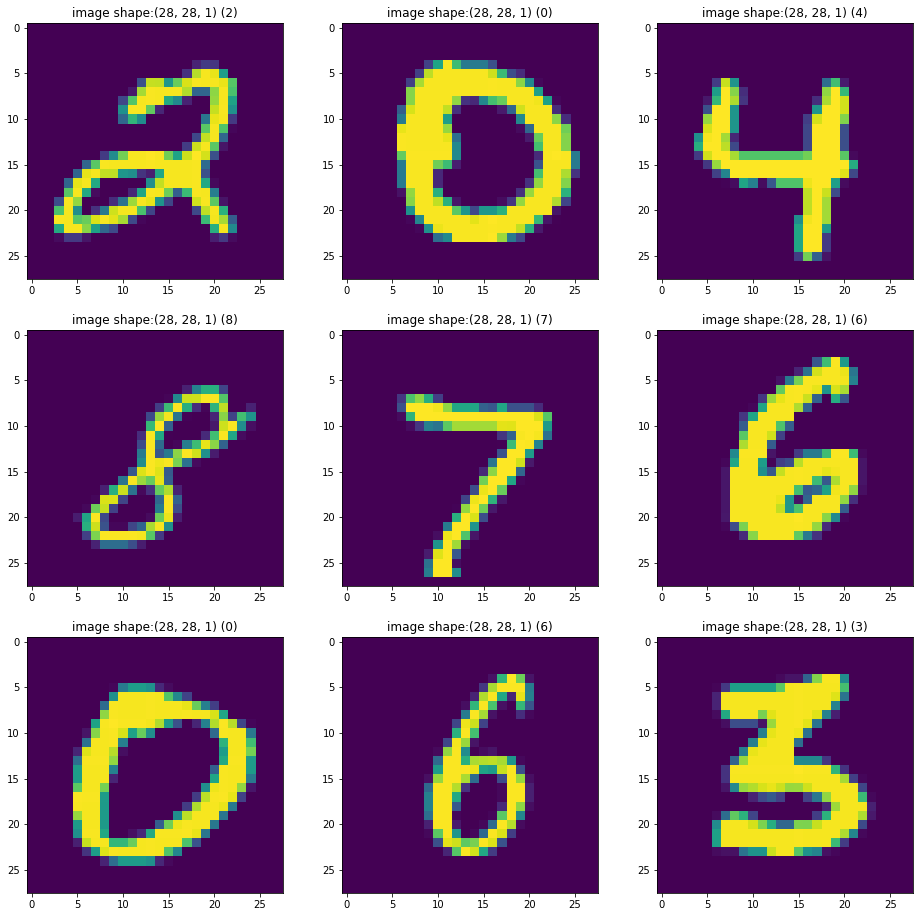

In [ ]:
def show_samples(dataset):
  fig=plt.figure(figsize=(16, 16))
  columns = 3
  rows = 3
  
  print(columns*rows,"samples from the dataset")
  i=1
  for a,b in dataset.take(columns*rows): 
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(a))
    #plt.imshow(a.numpy())
    plt.title("image shape:"+ str(a.shape)+" ("+str(b.numpy()) +")" )
    i=i+1
  plt.show()
show_samples(ds_raw_test)

9 samples from the dataset


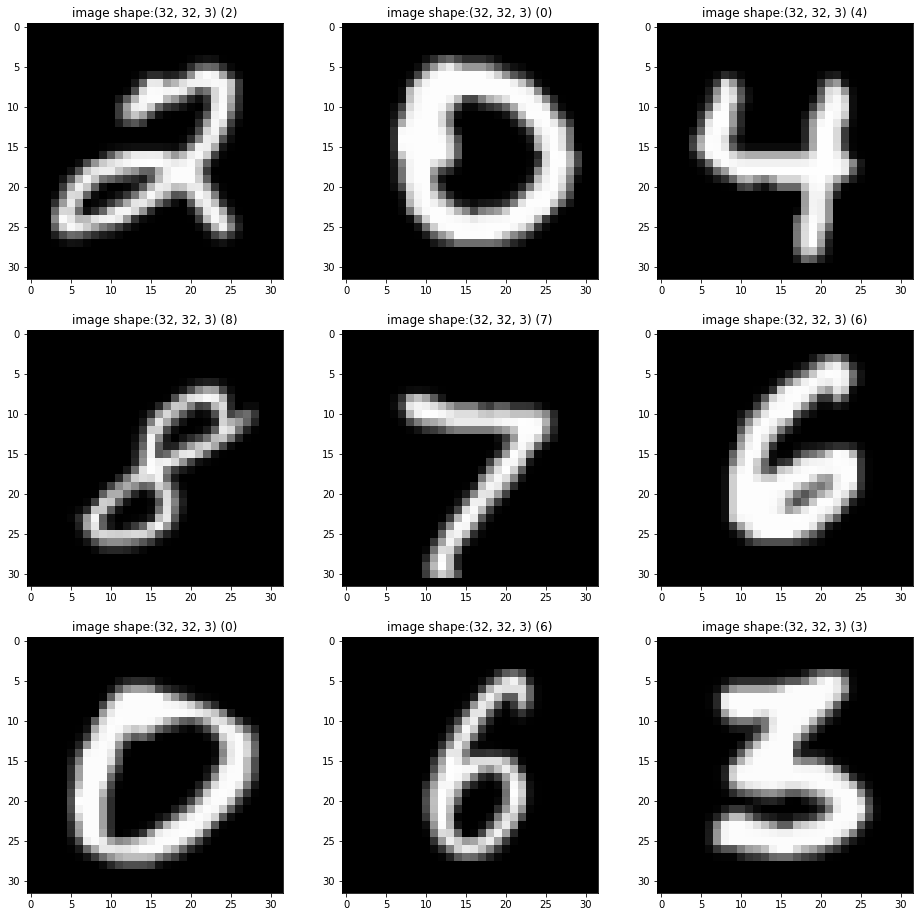

In [ ]:
#VGG16 expects min 32 x 32 
def resize_scale_image(image, label):
  image = tf.image.resize(image, [32, 32])
  image = image/255.0
  image = tf.image.grayscale_to_rgb(image)
  return image, label
ds_train_resize_scale=ds_raw_train.map(resize_scale_image)
ds_test_resize_scale=ds_raw_test.map(resize_scale_image)
show_samples(ds_test_resize_scale)

In [ ]:
batch_size = 64 
ds_train_resize_scale_batched=ds_train_resize_scale.batch(batch_size, drop_remainder=True ).cache().prefetch(tf.data.experimental.AUTOTUNE)
ds_test_resize_scale_batched=ds_test_resize_scale.batch(batch_size, drop_remainder=True ).cache().prefetch(tf.data.experimental.AUTOTUNE)
print("Number of batches in train: ", ds_train_resize_scale_batched.cardinality().numpy())
print("Number of batches in test: ", ds_test_resize_scale_batched.cardinality().numpy())

Number of batches in train:  93
Number of batches in test:  15


In [ ]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(32, 32, 3), # VGG16 expects min 32 x 32
    include_top=False)  # Do not include the ImageNet classifier at the top.
base_model.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
number_of_classes = 10
inputs = keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
initializer = tf.keras.initializers.GlorotUniform(seed=42)
activation =  None  # tf.keras.activations.sigmoid or softmax
outputs = keras.layers.Dense(number_of_classes,
                             kernel_initializer=initializer,
                             activation=activation)(x) 
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
model.fit(ds_train_resize_scale_batched, validation_data=ds_test_resize_scale_batched, epochs=10)

Epoch 1/10
93/93 [==============================] - 76s 801ms/step - loss: 1.7646 - sparse_categorical_accuracy: 0.5378 - val_loss: 1.3250 - val_sparse_categorical_accuracy: 0.7323
Epoch 2/10
93/93 [==============================] - 72s 771ms/step - loss: 1.1498 - sparse_categorical_accuracy: 0.7468 - val_loss: 0.9808 - val_sparse_categorical_accuracy: 0.7865
Epoch 3/10
93/93 [==============================] - 73s 791ms/step - loss: 0.9008 - sparse_categorical_accuracy: 0.7925 - val_loss: 0.8086 - val_sparse_categorical_accuracy: 0.8271
Epoch 4/10
93/93 [==============================] - 91s 977ms/step - loss: 0.7630 - sparse_categorical_accuracy: 0.8191 - val_loss: 0.7011 - val_sparse_categorical_accuracy: 0.8562
Epoch 5/10
93/93 [==============================] - 100s 1s/step - loss: 0.6721 - sparse_categorical_accuracy: 0.8380 - val_loss: 0.6251 - val_sparse_categorical_accuracy: 0.8729
Epoch 6/10
93/93 [==============================] - 73s 791ms/step - loss: 0.6059 - sparse_catego

In [ ]:
ds= ds_test_resize_scale
print("Test Accuracy: ", model.evaluate(ds.batch(batch_size=10))[1])
predictions= model.predict(ds.batch(batch_size=10).take(1))
y=[]
print("10 Sample predictions:")
for (pred,(a,b)) in zip(predictions,ds.take(10)):
  print("predicted: " , np.argmax(pred), "Actual Label: "+labels[b.numpy()]+" ("+str(b.numpy()) +")", " True" if (np.argmax(pred)==b.numpy()) else " False" )
  y.append(b.numpy())

100/100 [==============================] - 12s 121ms/step - loss: 0.4310 - sparse_categorical_accuracy: 0.9030
Test Accuracy:  0.902999997138977
10 Sample predictions:
predicted:  2 Actual Label: 2 (2)  True
predicted:  0 Actual Label: 0 (0)  True
predicted:  4 Actual Label: 4 (4)  True
predicted:  8 Actual Label: 8 (8)  True
predicted:  7 Actual Label: 7 (7)  True
predicted:  6 Actual Label: 6 (6)  True
predicted:  0 Actual Label: 0 (0)  True
predicted:  6 Actual Label: 6 (6)  True
predicted:  3 Actual Label: 3 (3)  True
predicted:  1 Actual Label: 1 (1)  True


activation function : Sigmoid

loss function : categorical cross entropy

9 samples from the dataset


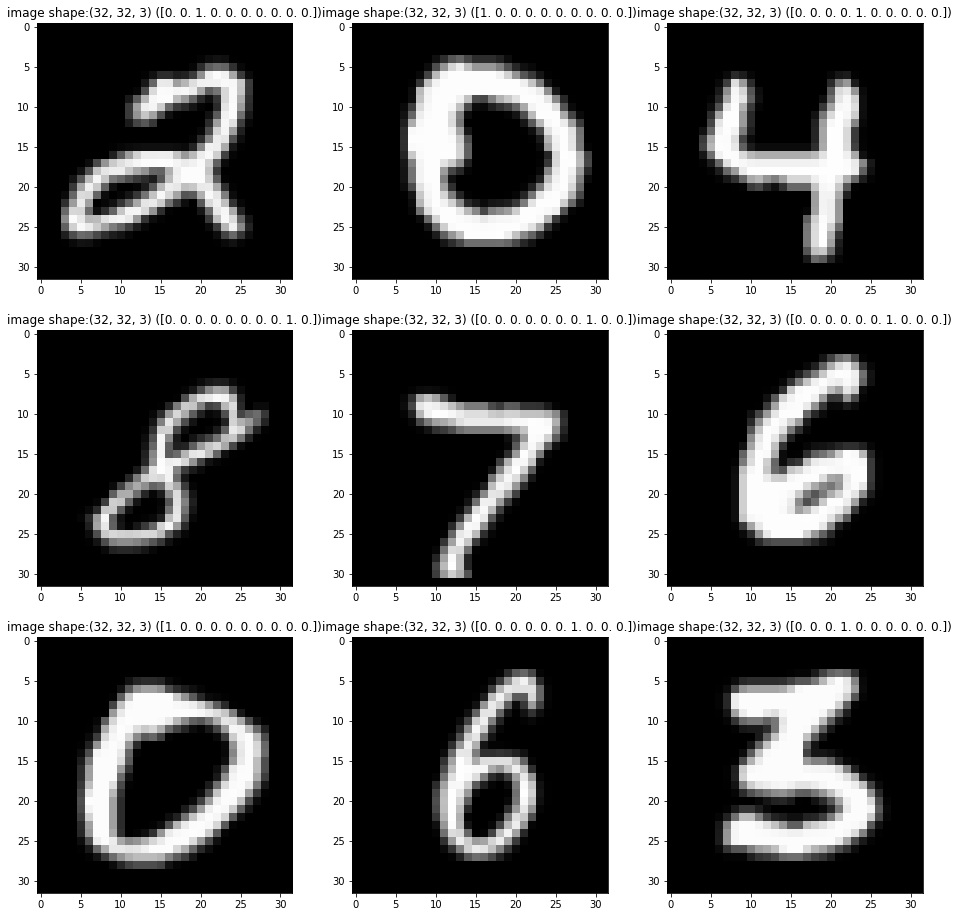

In [ ]:
def one_hot(image, label):
  label = tf.one_hot(label, depth=number_of_classes)
  return image, label
ds_train_resize_scale_one_hot= ds_train_resize_scale.map(one_hot)
ds_test_resize_scale_one_hot= ds_test_resize_scale.map(one_hot)
show_samples(ds_test_resize_scale_one_hot)

In [ ]:
ds_train_resize_scale_one_hot_batched=ds_train_resize_scale_one_hot.batch(64)
ds_test_resize_scale_one_hot_batched=ds_test_resize_scale_one_hot.batch(64)

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
initializer = tf.keras.initializers.GlorotUniform(seed=42)
activation = tf.keras.activations.sigmoid # None  #  tf.keras.activations.sigmoid or softmax
outputs = keras.layers.Dense(number_of_classes,
                             kernel_initializer=initializer,
                             activation=activation)(x) 
 
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(), # default from_logits=False
              metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
model.fit(ds_train_resize_scale_one_hot_batched, validation_data=ds_test_resize_scale_one_hot_batched, epochs=10)

Epoch 1/10
94/94 [==============================] - 79s 838ms/step - loss: 1.8375 - categorical_accuracy: 0.4812 - val_loss: 1.3710 - val_categorical_accuracy: 0.6960
Epoch 2/10
94/94 [==============================] - 79s 839ms/step - loss: 1.1790 - categorical_accuracy: 0.7535 - val_loss: 1.0094 - val_categorical_accuracy: 0.7850
Epoch 3/10
94/94 [==============================] - 74s 785ms/step - loss: 0.9183 - categorical_accuracy: 0.7955 - val_loss: 0.8290 - val_categorical_accuracy: 0.8160
Epoch 4/10
94/94 [==============================] - 76s 808ms/step - loss: 0.7747 - categorical_accuracy: 0.8202 - val_loss: 0.7168 - val_categorical_accuracy: 0.8410
Epoch 5/10
94/94 [==============================] - 75s 794ms/step - loss: 0.6805 - categorical_accuracy: 0.8385 - val_loss: 0.6379 - val_categorical_accuracy: 0.8580
Epoch 6/10
94/94 [==============================] - 73s 783ms/step - loss: 0.6122 - categorical_accuracy: 0.8528 - val_loss: 0.5783 - val_categorical_accuracy: 0.869

In [ ]:
ds= ds_test_resize_scale_one_hot
print("Test Accuracy: ", model.evaluate(ds.batch(batch_size=10))[1])
print("10 Sample predictions ")
predictions= model.predict(ds.batch(batch_size=10).take(1))
y=[]
for (pred,(a,b)) in zip(predictions,ds.take(10)):
  print("predicted: " , (pred), "Actual Label: "+str(b.numpy()) , " True" if (np.argmax(pred)==np.argmax(b.numpy())) else " False" )
  print()
  y.append(b.numpy())

100/100 [==============================] - 14s 144ms/step - loss: 0.4348 - categorical_accuracy: 0.9030
Test Accuracy:  0.902999997138977
10 Sample predictions 
predicted:  [0.07149279 0.00194898 0.85190856 0.40217578 0.3732814  0.529088
 0.06134683 0.10100478 0.46753335 0.17811662] Actual Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]  True

predicted:  [0.99050176 0.00102559 0.10926521 0.02373287 0.00250298 0.17090228
 0.47971255 0.01748133 0.14682627 0.5528558 ] Actual Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  True

predicted:  [0.0261662  0.02287871 0.3035257  0.1716913  0.9454888  0.24741462
 0.03788924 0.25729728 0.38732815 0.14140761] Actual Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]  True

predicted:  [0.02547812 0.00770795 0.72420424 0.29982045 0.28486454 0.35919154
 0.21824965 0.02640247 0.8775083  0.569503  ] Actual Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]  True

predicted:  [0.0444369  0.4077625  0.07447889 0.03664452 0.38824293 0.32338572
 0.08103392 0.97950226 0.01234618 0.11375389] Actu